In [1]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e)
    def rmse(self,X, y):
        return np.sqrt(2/X.shape[0] * self.loss(X, y))
    def fit(self, X, y):
        self.w = np.linalg.pinv(X) @ y
        return self.w
    def calculate_gradient(self, X, y):
        return X.T @ (self.predict(X) - y)
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(epochs):
            dJdw = calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

In [2]:
import itertools
import functools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

In [4]:
def compute_new_features(items):
    return functools.reduce(lambda x, y: x * y, items)

In [5]:
{each:compute_new_features(each) for each in combinations([2,3], 2)} #running a test

{(2, 2): 4, (2, 3): 6, (3, 3): 9}

In [6]:
[compute_new_features(each) for each in combinations(np.array([2,3]), 2)] #running a test

[4, 6, 9]

In [7]:
def polynomial_transform(x, degree, logging=True):
    if x.ndim == 1:
        x = x[:, None]

    features = [np.ones(len(x))] #a list of np-arrays with all 1.

    if logging:
        print(features)
    for degree in range(1, degree + 1):
        for item in combinations(x.T, degree):
            if logging:
                print(item)
            features.append(compute_new_features(item))
    if logging:
        print(features)
            
    return np.asarray(features).T

In [8]:
#feature vector [2,3] gets converted into two examples, 
#first with weight 2 and second with weight 3 [[2],[3]]
polynomial_transform(np.array([2, 3]), 2) # Want combinations of 2.

[array([1., 1.])]
(array([2, 3]),)
(array([2, 3]), array([2, 3]))
[array([1., 1.]), array([2, 3]), array([4, 9])]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [9]:
#Here, in a single example, we've 2 and 3 as two weights.  Want combinations of 2.
polynomial_transform(np.array([[2, 3]]), 2)

[array([1.])]
(array([2]),)
(array([3]),)
(array([2]), array([2]))
(array([2]), array([3]))
(array([3]), array([3]))
[array([1.]), array([2]), array([3]), array([4]), array([6]), array([9])]


array([[1., 2., 3., 4., 6., 9.]])

In [10]:
#Here, in a single example, we've two examples, each with two weights.  Want combinations of 2.
polynomial_transform(np.array([[2, 3],[4, 5]]), 2)

[array([1., 1.])]
(array([2, 4]),)
(array([3, 5]),)
(array([2, 4]), array([2, 4]))
(array([2, 4]), array([3, 5]))
(array([3, 5]), array([3, 5]))
[array([1., 1.]), array([2, 4]), array([3, 5]), array([ 4, 16]), array([ 6, 20]), array([ 9, 25])]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [11]:
#Here, in a single example, we've two examples, each with two weights.  Want combinations of 3.
polynomial_transform(np.array([[2, 3],[4, 5]]), 3)

[array([1., 1.])]
(array([2, 4]),)
(array([3, 5]),)
(array([2, 4]), array([2, 4]))
(array([2, 4]), array([3, 5]))
(array([3, 5]), array([3, 5]))
(array([2, 4]), array([2, 4]), array([2, 4]))
(array([2, 4]), array([2, 4]), array([3, 5]))
(array([2, 4]), array([3, 5]), array([3, 5]))
(array([3, 5]), array([3, 5]), array([3, 5]))
[array([1., 1.]), array([2, 4]), array([3, 5]), array([ 4, 16]), array([ 6, 20]), array([ 9, 25]), array([ 8, 64]), array([12, 80]), array([ 18, 100]), array([ 27, 125])]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [12]:
#Here, in a single example, we've two examples, each with two weights.  Want combinations of 3.
polynomial_transform(np.array([[2, 3],[4, 5],[6,7]]), 3)

[array([1., 1., 1.])]
(array([2, 4, 6]),)
(array([3, 5, 7]),)
(array([2, 4, 6]), array([2, 4, 6]))
(array([2, 4, 6]), array([3, 5, 7]))
(array([3, 5, 7]), array([3, 5, 7]))
(array([2, 4, 6]), array([2, 4, 6]), array([2, 4, 6]))
(array([2, 4, 6]), array([2, 4, 6]), array([3, 5, 7]))
(array([2, 4, 6]), array([3, 5, 7]), array([3, 5, 7]))
(array([3, 5, 7]), array([3, 5, 7]), array([3, 5, 7]))
[array([1., 1., 1.]), array([2, 4, 6]), array([3, 5, 7]), array([ 4, 16, 36]), array([ 6, 20, 42]), array([ 9, 25, 49]), array([  8,  64, 216]), array([ 12,  80, 252]), array([ 18, 100, 294]), array([ 27, 125, 343])]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.],
       [  1.,   6.,   7.,  36.,  42.,  49., 216., 252., 294., 343.]])

In [13]:
#Here, in a single example, we've one example, with one weight.  Want combinations of 0.
polynomial_transform(np.array([2]), 0)

[array([1.])]
[array([1.])]


array([[1.]])

The function below creates a non-linear training set as per y = Sin(2$\pi$*x)

In [14]:
def create_nonlin_training_set(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def nonlin(x):
    return np.sin(2 * np.pi * x)

In [15]:
def visualize_training_data(X_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)
    
    plt.scatter(X_train, y_train, s=50, label="training data")
    plt.plot(points, output, c='g', label='$\sin(2 \pi x)$')
    
    plt.xlabel = "$x_1$"
    plt.ylabel = "y"
    plt.legend()
    plt.show()

In [16]:
def visualize_model_fit(X, y, lin_reg, degree):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)
    
    if degree  > 0:
        plt.scatter(X, y, s=50, label="training data")
    plt.plot(points, output, c='g', label='$\sin(2 \pi x)$')
    
    y_hat = lin_reg.predict(polynomial_transform(points, degree,logging=False)) #predict function's second parameter is w.  What value should be used?
    plt.plot(points, y_hat, c='r', label='predicted')
    plt.xlabel = "$x_1$"
    plt.ylabel = "y"
    plt.legend()
#     plt.ylim(-1,5,1.5)
    plt.show()

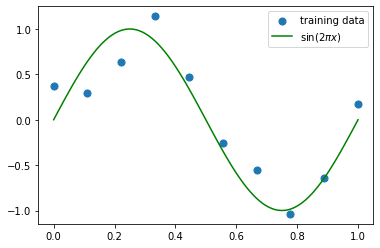

In [17]:
num_samples = 10
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(x, y)

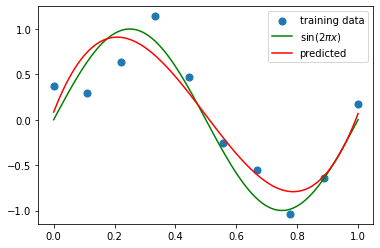

In [18]:
degree = 3
X_transform = polynomial_transform(x, degree,logging=False)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualize_model_fit(x, y, lin_reg, degree)

As the degree goes up, the overfitting problems appears.  However, overfitting can be reduced by increasing the number of samples.

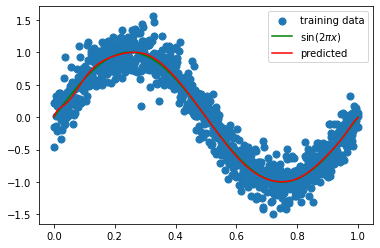

In [19]:
num_samples = 1000
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)

degree = 14
X_transform = polynomial_transform(x, degree,logging=False)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualize_model_fit(x, y, lin_reg, degree)

#### Ridge Regularization

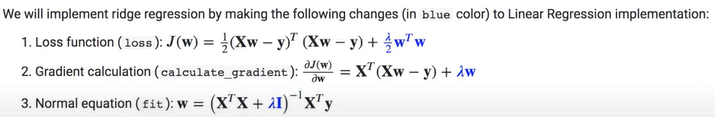

Let's implement the above changes to the LinReg class

In [20]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w)
    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate))
    def fit(self, X, y, reg_rate):
#         self.w = np.linalg.pinv(X) @ y
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(epochs):
            dJdw = calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initializing arbitrary values.
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

Test the new <b>LinReg</b> class with hard-coded X, y, w and regularization rate

In [21]:
X = np.array([[1,3,2,5],[1,9,4,7]])
y = np.array([6,11])
w = np.ones(X.shape[1])
reg_rate = 0.01

l = LinReg()
l.w = w

l.loss(X, y, reg_rate)
l.calculate_gradient(X, y, reg_rate)

array([ 15.01, 105.01,  50.01,  95.01])

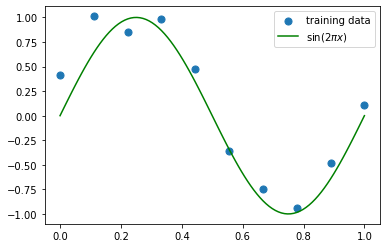

In [22]:
num_samples = 10
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(x, y)

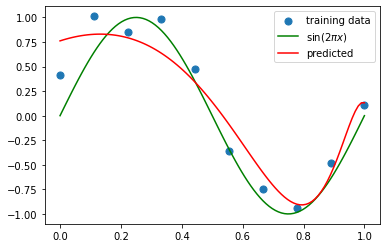

In [23]:
degree = 20
X_transform = polynomial_transform(x, degree,logging=False)
lin_reg = LinReg()
lin_reg.fit(X_transform, y, reg_rate)
visualize_model_fit(x, y, lin_reg, degree)

With a slighy lesser regularization rate than 0.1, it'll get a better fit, even at a much higher degree of 20.

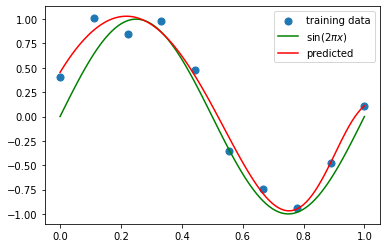

In [24]:
reg_rate = 0.0001
degree = 20
X_transform = polynomial_transform(x, degree,logging=False)
lin_reg = LinReg()
lin_reg.fit(X_transform, y, reg_rate)
visualize_model_fit(x, y, lin_reg, degree)

However, too much regularization will lead to underfitting.

Now, let us see, which regularization rate (from among a list) has the least rmse.

In [25]:
#Create the training set
num_samples = 10
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)

#Transform it
X_transform = polynomial_transform(x, degree,logging=False)

In [26]:
#Create the validation set
x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

#Transform it
X_val_transform = polynomial_transform(x_val, degree,logging=False)

In [27]:
degree = 9
w_dict = dict()
training_errors = dict()
val_errors = dict()

for reg_rate in [10,1,0.1,0.01,0.001, 0.0001]:
    lin_reg = LinReg()
    #Find the rmse for training set.
    lin_reg.fit(X_transform, y, reg_rate)
    w_dict[reg_rate] = lin_reg.w
    training_errors[reg_rate] = lin_reg.rmse(X_transform, y, reg_rate)
    #Find the rmse for validation set
    lin_reg.fit(X_val_transform, y_val, reg_rate)
    val_errors[reg_rate] = lin_reg.rmse(X_val_transform, y_val + 
                                        np.random.normal(scale=0.25, size=len(y_val)), reg_rate)
err_df = pd.DataFrame([training_errors, val_errors], index=['Training errors', 'Validation Errors']).T
w_df = pd.DataFrame(w_dict)

<AxesSubplot:>

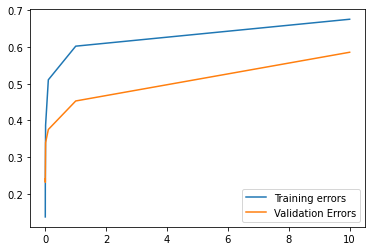

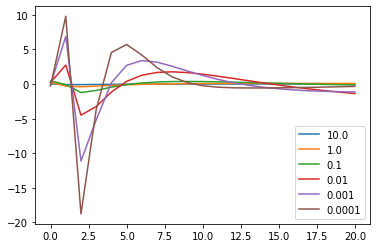

In [28]:
err_df.plot()
w_df.plot()